In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation
% matplotlib inline

In [2]:
pwd

'C:\\Users\\mnan\\Desktop'

In [4]:
cd Q6

C:\Users\mnan\Desktop\Q6


# Data Preparation

In [8]:
df = pd.read_csv('credit_data_.csv',header = None)

In [42]:
columns_need_to_be_normalized=range(len(df.columns))

list= []
for i in columns_need_to_be_normalized:
    list.append(df.columns.tolist()[i])
X_to_normalize = df.iloc[:,columns_need_to_be_normalized]
min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X_to_normalize)
df.iloc[:,columns_need_to_be_normalized]=X_normalized

# Correlation and Distribution Check

In [43]:
for i in range(len(df.columns.tolist())):
    columni = df.columns.tolist()[i]
    for j in range(i+1,len(df.columns.tolist())-i):
        columnj = df.columns.tolist()[j]
        corij = np.corrcoef(df[columni],df[columnj])[0,1]
        print("correlation between column %s and column %s is\n%s" % (df.columns.tolist()[i],df.columns.tolist()[j],corij))

correlation between column 0 and column 1 is
0.820276193516
correlation between column 0 and column 2 is
0.925010381023
correlation between column 0 and column 3 is
0.335940072279
correlation between column 0 and column 4 is
0.283110113799
correlation between column 0 and column 5 is
0.0318507912752
correlation between column 1 and column 2 is
0.80372747656
correlation between column 1 and column 3 is
0.418101762299
correlation between column 1 and column 4 is
0.447762944957
correlation between column 2 and column 3 is
0.307021012059


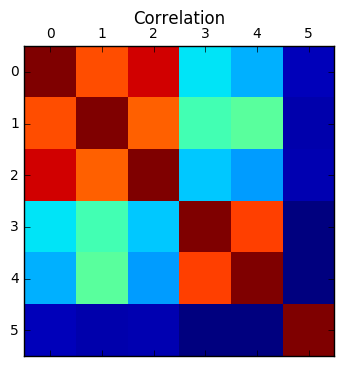

In [44]:
plt.matshow(df.corr())
plt.title('Correlation')
plt.show()
plt.close() 

** High Correlation exist among features, which indicate this dataset actually contain limited informtaion.**

C:\Users\mnan\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


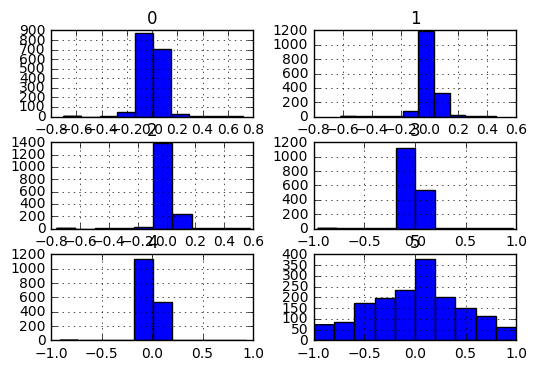

In [45]:
fig = plt.figure()
df.iloc[:,:].diff().hist()
fig.show()

** All of them are roughly normally distributed and most are highly centralized.**

In [64]:
Y = [1]*1540 + [0]* 130

In [50]:
X = df.values

In [51]:
X.shape

(1670, 6)

# Model Building

### Conduct k-fold (k=10) cross validation for the data and use the following prediction to conduct classiﬁcations and compare their results 
 
 ∗ SVM with ’linear’, ’rbf’, ’poly’, and ’sigmoid’ respectively 
 
 ∗ Gradient boost 
 
 ∗ Random forests 
 
 ∗ k-NN (you can try diﬀerent distances)


** svm**

In [86]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

In [87]:
dict_svm = dict()

In [92]:
for kernel in kernels:
    svc = SVC(kernel=kernel,probability=True)
    scores_svc = cross_val_score(svc,X,Y,cv=10,scoring = 'f1')
    svc.fit(X,Y)
    svc.predict_proba(X)
    dict_svm[kernel] = scores_svc.mean()
print(dict_svm)

{'linear': 0.99453568366596967, 'poly': 0.95950155763239875, 'rbf': 0.97842618888135424, 'sigmoid': 0.95950155763239875}


** Gradient Boost**

In [93]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02,
                                max_depth=3, random_state=0)
scores_GB = cross_val_score(GB,X,Y,scoring = 'f1',cv = 10) 
scores_GB.mean()

0.9993527508090615

**Random forsts** 

1. 3 (0.524657)
2. 1 (0.317103)
3. 4 (0.087953)
4. 0 (0.067745)
5. 2 (0.001944)
6. 5 (0.000599)


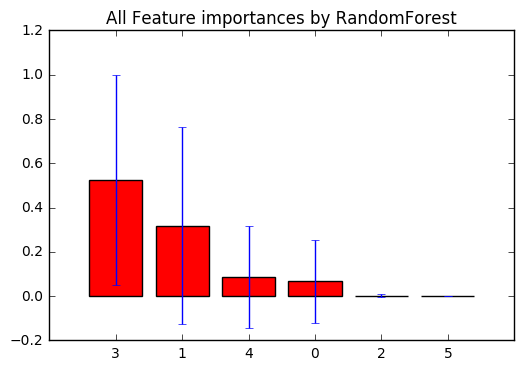

In [94]:
forest = RandomForestClassifier()
scores_RF = cross_val_score(forest,X,Y,cv=10,scoring = 'f1') ###tried cv=10: 0.788

forest.fit(X,Y)
importances_allfeatures = forest.feature_importances_
importances_allfeatures[:3]

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances_allfeatures)[::-1]
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances_allfeatures[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("All Feature importances by RandomForest")
plt.bar(range(X.shape[1]), importances_allfeatures[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

**The third feature, which is Earnings Before Interests and Taxes / Total Assets (EBIT_TA), is proved 
to be the best.**

**The second and fifth one, Retained Earnings / Total Assets (RE_TA) and Sales / Total Assets (S_TA), are ignorable. **

In [95]:
scores_RF.mean()

1.0

In [96]:
scores_RF.min()

1.0

**k-NN**

In [104]:
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X, Y)
knn_scores = cross_val_score(neigh,X,Y,cv=10,scoring = 'f1')
knn_scores.mean()

0.98691210290664488

### Comparison

#### All the algorithms are good. RandomForest performs the best